In [1]:
import specdist as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection
from matplotlib.ticker import LogLocator
import re
scientific_notation = pi.scientific_notation

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import warnings; warnings.simplefilter('ignore')

path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/figures/"

xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj
#1./4.698e-4*2. = 4257.130693912303

# sd_lib_bare = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('bare',sd_lib_bare)


# sd_lib_lyc = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc',sd_lib_lyc)

# sd_lib_lyc_reio = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc_reio',sd_lib_lyc_reio)




label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'
label_fdm = 'Effective Dark Matter Fraction, '+r'$\epsilon f_\mathrm{dm}$'
label_mdm = 'Particle Mass, ' +r'$m_\mathrm{dm}\,\,[\mathrm{eV}]$'
label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'
label_redshift = 'Redshift, '+r'$z$'
label_mu_dist =  'Chemical Potential, '+r'$\mu$'
label_injection_frequency = "Scaled Injection Frequency, "+ r'$x_{\mathrm{inj,0}}$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_frequency_in_GHz = "Frequency,  "+ r'$\nu \quad [\mathrm{GHz}]$'
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_intensity_kJy = "Intensity, "+r'$\Delta I_x \quad [\mathrm{kJy/sr}]$'
label_injection_energy = "Injection Energy, "+ r'$E_{\mathrm{inj,0}}$' + " [eV]"
xinj_to_Einj = 4.698e-4/2.
label_Gamma = "Decay Rate, "+r"$\Gamma_X\quad[\mathrm{s^{-1}}]$"

label_zX = "Maximum Injection Redshift, "+ r'$z_X$'
sd = pi

label_Gamma_stim = r"$\Gamma_X^\mathrm{stim}/\Gamma_X=[1+2n_\mathrm{Pl}(x_\mathrm{inj})]$"

label_zX = "Maximum Injection Redshift, "+ r'$z_X$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'

label_log10Tau_x = "Lifetime,  "+r'$\mathrm{log}_{10}(\tau_X/\,1\mathrm{s})$'
label_Tau_x = "Lifetime,  "+r'$\tau_X\quad[\mathrm{s}]$'
label_log10injection_energy = "Injection Energy, "+ r'$\mathrm{log}_{10}(E_{\mathrm{inj,0}}/\,1\mathrm{eV})$'
label_log10mdm = 'Particle Mass, ' +r'$\mathrm{log}_{10}(m_\mathrm{X}/\,1\mathrm{eV})$'

def get_fdm_constraints_at_Gamma_and_xinj(gamma_p,xinj_p,*args,**kwargs):
    a_lib = kwargs['sd_lib']
    f_dm_fisher = sd.pi_run_fisher_constraints([gamma_p],[xinj_p],**kwargs)
    fdm_value = f_dm_fisher['curves'][0]['fdm'][0]
    #x_asked = np.logspace(np.log10(1e-8),np.log10(1e8),3000)
    #fdm_value = GetSpectra(gamma_p,xinj_p,x_asked,a_lib,get_fisher_fdm='yes',use_edges='yes')["fisher_fdm"]
    fdm_pca_value_ct = np.nan
    fdm_pca_value_rf = np.nan
    if gamma_p < 1e-12:
        # using recfast:
        #f_dm_pca = pi_run_pca_constraints_with_recfast([xinj_p],[gamma_p],fdm_value,**kwargs)
        #fdm_pca_value_rf = f_dm_pca['curves'][0]['fdm'][0]
        
        # using CT:
        z_asked = np.logspace(np.log10(1e-2),np.log10(4000),5000)
        S_xe_history = sd.GetXeHistory(gamma_p,xinj_p,z_asked,a_lib)
        fdm_pca_value_ct = S_xe_history['fdm_pca_lim']
    r_dict = {}
    r_dict['fdm_fisher'] = fdm_value
    r_dict['fdm_Xe_pca_rf'] = fdm_pca_value_rf
    r_dict['fdm_Xe_pca_ct'] = fdm_pca_value_ct
    return r_dict



label_injection_energy_excited = "Excited State Energy, "+ r'$E_X^{\mathrm{ex}}$' + " [eV]"

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [5]:
case = 'lyc+reio'
name_ext = ''
add_edges = 'no'
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_no_edges'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-6 if math.isnan(x) else x for x in Zf[:,i]]




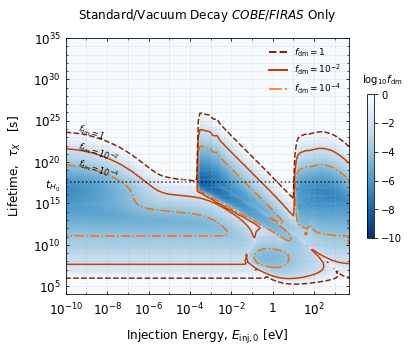

In [15]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],
                           tau_values[-1]],
               origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -20,
          fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -20,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -20,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')



ax.patch.set_color(colormap2(0.99)) # or whatever color you like


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


#ax.text(-1., 33., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


#plt.legend()
ax.xaxis.set_label_coords(0.5,-0.13)


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                #Line2D([0], [0], color=cmap(.2), lw=2,ls='--'),
                #Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')
               ]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         #r'$f_\mathrm{dm}=10^{-8}$',
                        #r'Age of the Universe'
                        ],loc=1,
        fontsize=9,
         frameon = False,
          ncol = 1,
         facecolor='grey',framealpha=0.2)





plt.title(r'Standard/Vacuum Decay $COBE/FIRAS$ Only',pad = 19)
name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/fig_tau_E_a.pdf')

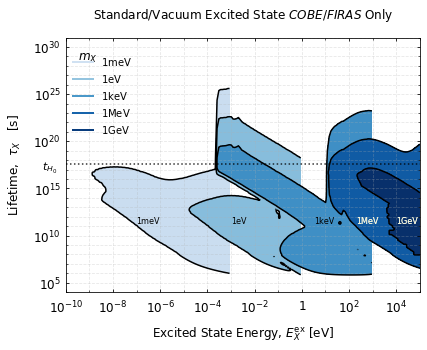

In [6]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)



colormap = plt.cm.Oranges #or any other colormap
colormap = plt.cm.Blues
colormap2 = plt.cm.Oranges
normalize = matplotlib.colors.Normalize(vmin=-5, vmax=10)
colormap_r =  plt.cm.Blues

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > -3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [-3,0]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')

#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 0:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [0,3]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')
#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-.','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [3,6]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')


Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 6:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [6,9]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 9:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [9,100]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')



ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))




ax.text(-7, 12, '1meV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-3, 12, '1eV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(0.5, 12, '1keV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.3, 12, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.3, 12, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(4, 12, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(4, 12, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))





ax.text(-9.5, 29.5, r'$m_X$' , rotation = 0,
        fontsize=12, 
        verticalalignment='top',color='k',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))











ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy_excited,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.12,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

#ax.set_xlim(-10.5,np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,31)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.2), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.4), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.95), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$1 \mathrm{meV}$', 
                         r'$1 \mathrm{eV}$', 
                         r'$1 \mathrm{keV}$', 
                         r'$1 \mathrm{MeV}$',
                         r'$1 \mathrm{GeV}$'],
                       # r'Age of the Universe'],
          loc=(0.01,0.6),
        fontsize=10,ncol=1,
         frameon = False,
         facecolor='grey',framealpha=0.2)

#ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)

plt.title(r'Standard/Vacuum Excited State $COBE/FIRAS$ Only',pad = 19)
#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/fig_tau_m_a.pdf')

In [47]:
Einj_values[0]

-10.0

In [7]:
# load the results
case = 'lyc+reio'
add_edges = 'yes'
name_ext = ''
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-6 if math.isnan(x) else x for x in Zf[:,i]]



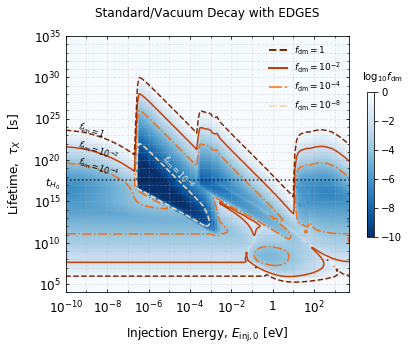

In [19]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],
                           tau_values[-1]],
               origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -20,
          fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -20,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -20,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

#ax.patch.set_color('white') # or whatever color you like
#ax.patch.set_alpha(.2)

ax.patch.set_color(colormap2(0.99)) # or whatever color you like

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


#ax.text(-1., 33., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


#plt.legend()
ax.xaxis.set_label_coords(0.5,-0.13)


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--')#,
                #Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')
               ]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$'
                        #r'Age of the Universe'
                        ],loc=1,
        fontsize=9,
         frameon = False,
         facecolor='grey',framealpha=0.2)





plt.title('Standard/Vacuum Decay with EDGES',pad = 19)
name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/fig_tau_E_b.pdf')

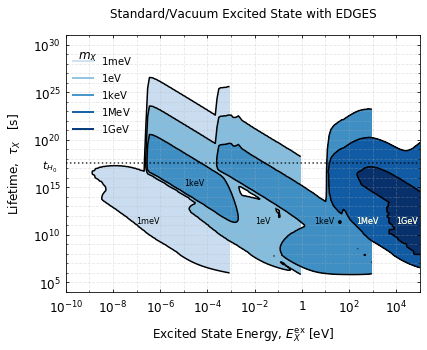

In [8]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)



colormap = plt.cm.Oranges #or any other colormap
colormap = plt.cm.Blues
colormap2 = plt.cm.Oranges
normalize = matplotlib.colors.Normalize(vmin=-5, vmax=10)
colormap_r =  plt.cm.Blues

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > -3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [-3,0]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')

#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 0:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [0,3]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')
#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-.','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [3,6]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')


Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 6:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [6,9]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 9:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [9,100]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')



ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))




ax.text(-7, 12, '1meV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-2, 12, '1eV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(0.5, 12, '1keV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-5, 16, '1keV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.3, 12, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.3, 12, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(4, 12, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(4, 12, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))







ax.text(-9.5, 29.5, r'$m_X$' , rotation = 0,
        fontsize=12, 
        verticalalignment='top',color='k',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))











ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy_excited,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.12,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

#ax.set_xlim(-10.5,np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,31)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.2), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.4), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.95), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$1 \mathrm{meV}$', 
                          r'$1 \mathrm{eV}$', 
                         r'$1 \mathrm{keV}$', 
                         r'$1 \mathrm{MeV}$',
                         r'$1 \mathrm{GeV}$'],
                       # r'Age of the Universe'],
          loc=(0.01,0.6),
        fontsize=10,ncol=1,
         frameon = False,
         facecolor='grey',framealpha=0.2)

#ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)

plt.title(r'Standard/Vacuum Excited State with EDGES',pad = 19)
#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/fig_tau_m_b.pdf')

In [9]:
case = 'lyc+reio'
name_ext = ''
add_edges = 'yes'
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_high_xinj_260920_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-9 if math.isnan(x) else x for x in Zf[:,i]]




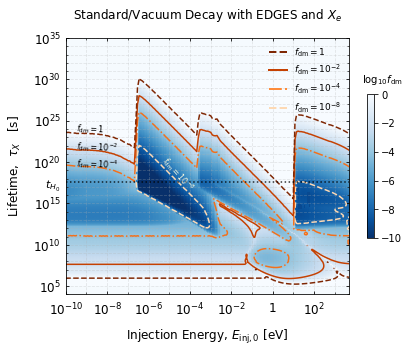

In [25]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 1.5


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-5, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)


# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],
                           tau_values[-1]],
               origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 24.8, r'$f_\mathrm{dm}=1$' , rotation = -3,
          fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 22.8, r'$f_\mathrm{dm}=10^{-2}$' , rotation = -3,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 20.8, r'$f_\mathrm{dm}=10^{-4}$' , rotation = -3,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-5.5, 21, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -49,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))




ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='None')

#ax.patch.set_color('white') # or whatever color you like
#ax.patch.set_alpha(.2)
ax.patch.set_color(colormap2(0.99)) # or whatever color you like

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


#ax.text(-1., 33., 'Vacuum Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.4))


#plt.legend()
ax.xaxis.set_label_coords(0.5,-0.13)


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--')#,
                #Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')
               ]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$'#,
                        #r'Age of the Universe'
                        ],loc=1,
        fontsize=9,
         frameon = False,
          ncol = 1,
         facecolor='grey',framealpha=0.2)





plt.title(r'Standard/Vacuum Decay with EDGES and $X_{e}$',pad = 19)
name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run_wpca'
name_ext += '.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/fig_tau_E_c.pdf')

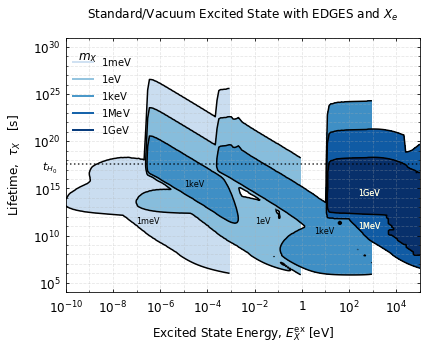

In [10]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)



colormap = plt.cm.Oranges #or any other colormap
colormap = plt.cm.Blues
colormap2 = plt.cm.Oranges
normalize = matplotlib.colors.Normalize(vmin=-5, vmax=10)
colormap_r =  plt.cm.Blues

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > -3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [-3,0]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')

#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 0:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [0,3]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')
#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-.','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [3,6]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')


Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 6:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [6,9]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 9:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [9,100]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')



ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))




ax.text(-7, 12, '1meV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-2, 12, '1eV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(0.5, 11, '1keV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-5, 16, '1keV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(2.4, 11.5, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.4, 11.5, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.4, 15, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(2.4, 15, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))






ax.text(-9.5, 29.5, r'$m_X$' , rotation = 0,
        fontsize=12, 
        verticalalignment='top',color='k',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))











ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy_excited,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.12,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

#ax.set_xlim(-10.5,np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,31)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.2), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.4), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.95), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$1 \mathrm{meV}$', 
                          r'$1 \mathrm{eV}$', 
                         r'$1 \mathrm{keV}$', 
                         r'$1 \mathrm{MeV}$',
                         r'$1 \mathrm{GeV}$'],
                       # r'Age of the Universe'],
          loc=(0.01,0.6),
        fontsize=10,ncol=1,
         frameon = False,
         facecolor='grey',framealpha=0.2)

#ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)

plt.title(r'Standard/Vacuum Excited State with EDGES and $X_e$',pad = 19)
#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/fig_tau_m_c.pdf')

In [2]:
# save the results
add_edges = 'yes'
case = 'lyc+reio'
name_ext = ''
if case == 'lyc+reio':
     name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
name_ext += '_extended_run_stim_070920_no_edges_wpca'
#name_ext += '_test'
path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Einj_in_ev' + name_ext + '.txt'
Xf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_Tau_X_in_s' + name_ext + '.txt'
Yf = np.loadtxt(path)

path = '/Users/boris/Work/SPECTRAL-DISTORTIONS/specdist/specdist/data/f_dm_constraints/log10_f_dm' + name_ext + '.txt'
Zf = np.loadtxt(path)

import math
for i in range(200):
    Zf[:,i] = [-9 if math.isnan(x) else x for x in Zf[:,i]]

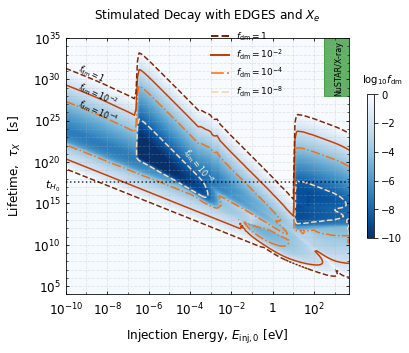

In [24]:
fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]

# tau_values = np.linspace(5,30,500)
# Einj_values =np.linspace(-10,5,500)

# tau_values = 10**Yf[0]
# Einj_values = 10**Xf[0]
# xlist = Einj_values
# ylist = tau_values

levels = [-8,-4,-2,0]

colormap = plt.cm.Oranges #or any other colormap
colormap2 = plt.cm.Blues_r
colormap2 = colormap2
normalize = matplotlib.colors.Normalize(vmin=-10, vmax=0)

CS = ax.contour(Xf, Yf, Zf,levels,cmap = colormap,norm=normalize,linestyles=['--','-.','-','--'])


# CS.levels = [0.0001,0.01,1]


# # Label levels with specially formatted floats
# if plt.rcParams["text.usetex"]:
#     fmt = r'%r \%%'
# else:
#     fmt = r'$f_\mathrm{dm}=%r$'
    
# fmt = ticker.LogFormatterMathtext()

#ax.clabel(CS, CS.levels, inline=10, fontsize=8,fmt=fmt)
 

# masses_ev = np.logspace(-9,9,100)
# tau_dfsz = 1.1581e27*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_dfsz),c='k',lw=2,ls=':')
# tau_ksvz = 8.9078e23*masses_ev**-5
# ax.plot(np.log10(masses_ev*mass_to_Einj),np.log10(tau_ksvz),c='k',lw=2,ls=':')


ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


#ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_xlim(Einj_values[0],np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,35)

ax.set_xlabel(label_injection_energy,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.15,0.5)
ax.xaxis.set_label_coords(0.5,-.09)




# im = ax.imshow(Zf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#            cmap=colormap2,norm=normalize, alpha=1.)


im = ax.imshow(Zf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)


ax.text(-9.5, 32., r'$f_\mathrm{dm}=1$' , rotation = -25,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 30., r'$f_\mathrm{dm}=10^{-2}$' , rotation = -25,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-9.5, 28., r'$f_\mathrm{dm}=10^{-4}$' , rotation = -25,
         fontsize=8, 
          verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



ax.text(-4.5, 22, r'$f_\mathrm{dm}=10^{-8}$' , rotation = -52,
         fontsize=8, 
          verticalalignment='top',
          color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

#ax.text(0.91, 0.29, r'Non Thermal' , rotation = 70,color='r',
#        transform=ax.transAxes, fontsize=7, 
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


#ax.plot(np.log10(E_nt*1e3),np.log10(1./G_nt),c='red',ls=':')
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='r',alpha=0.3)
#ax.fill_between(np.log10(E_nt*1e3),0,np.log10(1./G_nt),hatch='//',color='None',edgecolor='r')

ax.patch.set_color(colormap2(0.99)) # or whatever color you like

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=2,ls='--'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.5), lw=2,ls='-.'),
                Line2D([0], [0], color=cmap(.2), lw=2,ls='--')#,
                #Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')
               ]
ax.legend(custom_lines, [r'$f_\mathrm{dm}=1$', 
                         r'$f_\mathrm{dm}=10^{-2}$', 
                         r'$f_\mathrm{dm}=10^{-4}$',
                         r'$f_\mathrm{dm}=10^{-8}$',
                        #r'Age of the Universe'
                        ],loc=(0.5,0.75),
         fontsize=9,
         frameon = False,
         facecolor='grey',framealpha=0.2)

ax.fill_between(np.linspace(5/2.,50/2.,30),np.full((30),28),np.full((30),35),color='green',alpha=0.6)

ax.text(3, 28, r'NuSTAR/X-ray' , rotation = 90,
         fontsize=8, 
          verticalalignment='bottom',
          color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.xaxis.set_label_coords(0.5,-0.13)
plt.title(r'Stimulated Decay with EDGES and $X_e$',pad = 19)
#plt.legend()


name_ext = ''
case = 'lyc+reio'
if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '_extended_run'
name_ext += '_with_edge_wpcas.pdf'
cb = fig.colorbar(im,shrink=0.5)
cb.set_label(r'$\log_{10} f_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
plt.savefig(path_to_figures + '/fig_tau_E_d.pdf')

In [16]:
Einj_values

array([-10.      ,  -9.9246  ,  -9.8492  ,  -9.7739  ,  -9.6985  ,
        -9.6231  ,  -9.5477  ,  -9.4724  ,  -9.397   ,  -9.3216  ,
        -9.2462  ,  -9.1709  ,  -9.0955  ,  -9.0201  ,  -8.9447  ,
        -8.8693  ,  -8.794   ,  -8.7186  ,  -8.6432  ,  -8.5678  ,
        -8.4925  ,  -8.4171  ,  -8.3417  ,  -8.2663  ,  -8.191   ,
        -8.1156  ,  -8.0402  ,  -7.9648  ,  -7.8894  ,  -7.8141  ,
        -7.7387  ,  -7.6633  ,  -7.5879  ,  -7.5126  ,  -7.4372  ,
        -7.3618  ,  -7.2864  ,  -7.2111  ,  -7.1357  ,  -7.0603  ,
        -6.9849  ,  -6.9095  ,  -6.8342  ,  -6.7588  ,  -6.6834  ,
        -6.608   ,  -6.5327  ,  -6.4573  ,  -6.3819  ,  -6.3065  ,
        -6.2312  ,  -6.1558  ,  -6.0804  ,  -6.005   ,  -5.9296  ,
        -5.8543  ,  -5.7789  ,  -5.7035  ,  -5.6281  ,  -5.5528  ,
        -5.4774  ,  -5.402   ,  -5.3266  ,  -5.2513  ,  -5.1759  ,
        -5.1005  ,  -5.0251  ,  -4.9497  ,  -4.8744  ,  -4.799   ,
        -4.7236  ,  -4.6482  ,  -4.5729  ,  -4.4975  ,  -4.422

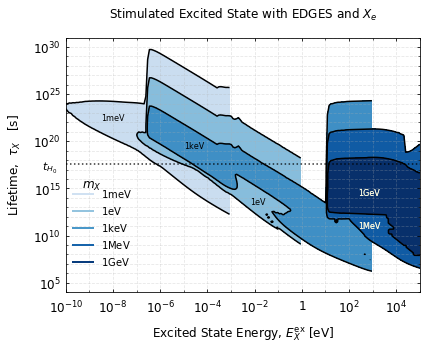

In [13]:
import matplotlib as mpl

fig,ax=plt.subplots(1,1,figsize=(6,5))
label_size = 12
title_size = 12
legend_size = 25
handle_length = 2


tau_values = Yf[:,0]
Einj_values = Xf[0]
Mf = np.log10((10**Zf/10**Einj_values)**-1)



colormap = plt.cm.Oranges #or any other colormap
colormap = plt.cm.Blues
colormap2 = plt.cm.Oranges
normalize = matplotlib.colors.Normalize(vmin=-5, vmax=10)
colormap_r =  plt.cm.Blues

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > -3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [-3,0]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')

#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 0:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [0,3]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',linestyles='-')
#CS = ax.contour(Xf, Yf, Mf,levels,cmap = colormap2 ,norm=normalize,linestyles=['-.','-','--','-'])



Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 3:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [3,6]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')


Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 6:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [6,9]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')

Mf = np.log10((10**Zf/10**Einj_values)**-1)
e = 0
for einj in Einj_values:
    t = 0
    for tau in tau_values:
        if einj > 9:
            Mf[t][e] = np.nan
        t += 1
    e += 1

levels = [9,100]
CS = ax.contourf(Xf, Yf, Mf,levels,cmap = colormap,norm=normalize,linestyles=['-','-.','--','-'])
CS2 = ax.contour(CS, levels=CS.levels[::2], colors='k',ls='-')



ax.text(-11, 18, r'$t_{H_0}$' , rotation = 0,
        fontsize=11, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))




ax.text(-8.5, 23, '1meV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-2.2, 14, '1eV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))



#ax.text(0.5, 11, '1keV' , rotation = 0,
#        fontsize=8, 
#          verticalalignment='top',color='k',
#          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(-5, 20, '1keV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='k',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.4, 11.5, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.4, 11.5, '1MeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))


ax.text(2.4, 15, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ax.text(2.4, 15, '1GeV' , rotation = 0,
        fontsize=8, 
          verticalalignment='top',color='beige',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))







ax.text(-9.3, 16, r'$m_X$' , rotation = 0,
        fontsize=12, 
        verticalalignment='top',color='k',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))











ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)



ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


name_ext = ''

if case == 'lyc+reio':
    name_ext += '_lyc_reio'
elif case == 'bare':
    name_ext += '_bare'
if add_edges == 'yes':
    name_ext += '_with_edges'
else:
    name_ext += '_no_edges'
name_ext += '.pdf'

ax.set_xlim(Einj_values[0],Einj_values[-1])
ax.set_ylim(tau_values[0],tau_values[-1])


#ax.yaxis.set_label_coords(-.08,0.5)
ax.set_xlabel(label_injection_energy_excited,size=title_size)
#ax.set_ylabel("coupling constant, "+r'$g_\mathrm{a\gamma\gamma}\quad[\mathrm{GeV}^{-1}]$',size=title_size)
ax.set_ylabel(label_Tau_x,size=title_size)

ax.yaxis.set_label_coords(-.12,0.5)
ax.xaxis.set_label_coords(0.5,-.09)

#im = ax.imshow(Mf, extent=[Einj_values[0], Einj_values[-1],tau_values[0],tau_values[-1]], origin='lower',
#           #cmap=colormap2,
#               norm=normalize, alpha=1.)


#im = ax.imshow(Mf, extent=[-10,5,tau_values[0],tau_values[-1]], origin='lower',
#           cmap=colormap2,norm=normalize, alpha=1.,aspect=0.4)

#ax.set_xlim(-10.5,np.log10(5e3))
#ax.set_ylim(tau_values[0],tau_values[-1])
ax.set_ylim(4,31)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xticklabels([r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$1$',r'$10^{2}$',r'$10^{4}$'])
ax.set_yticklabels([r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$'])

        
#ax.text(-2, 33, 'Stimulated Decay', fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='blue', alpha=0.4))

ax.set_yticklabels([r'$10^{5}$',r'$10^{5}$',r'$10^{10}$',r'$10^{15}$',r'$10^{20}$',r'$10^{25}$',r'$10^{30}$',r'$10^{35}$'])


ax.axhline(np.log10(4.e17),alpha=0.8,c='k',ls=':')


cmap = colormap
custom_lines = [Line2D([0], [0], color=cmap(.2), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.4), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.6), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.8), lw=2,ls='-'),
                Line2D([0], [0], color=cmap(.95), lw=2,ls='-'),
                Line2D([0], [0], color='k',alpha=0.8,lw=2,ls=':')]
ax.legend(custom_lines, [r'$1 \mathrm{meV}$', 
                          r'$1 \mathrm{eV}$', 
                         r'$1 \mathrm{keV}$', 
                         r'$1 \mathrm{MeV}$',
                         r'$1 \mathrm{GeV}$'],
                       # r'Age of the Universe'],
          loc=(0.01,0.08),
        fontsize=10,ncol=1,
         frameon = False,
         facecolor='grey',framealpha=0.2)

#ax.patch.set_color(colormap2(0.99)) # or whatever color you like
#ax.patch.set_alpha(.2)

ax.xaxis.set_label_coords(0.5,-0.13)

plt.title(r'Stimulated Excited State with EDGES and $X_e$',pad = 19)
#cb = fig.colorbar(im,shrink=0.5)
#cb.set_label(r'$\log_{10} m_\mathrm{dm}$', labelpad=-20, y=1.15,rotation=0)
fig.tight_layout()
#plt.legend()
plt.savefig(path_to_figures + '/fig_tau_m_d.pdf')